In [114]:
# Importing essential libraries for data analysis and visualization
import pandas as pd  # For data loading, manipulation, and analysis (DataFrames)
import numpy as np   # For numerical operations and array handling
# Visualization libraries
import matplotlib.pyplot as plt  # For creating basic visual plots (line, bar, scatter, etc.)
import seaborn as sns            # For advanced, attractive statistical plots (built on matplotlib)
# Machine learning libraries
from sklearn.cluster import KMeans  # K-Means clustering algorithm (unsupervised learning)
from sklearn.preprocessing import StandardScaler  # To scale/normalize features before clustering


In [115]:
# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

In [116]:
# Show first 5 rows of data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
# Create a new column for Annual Income in full dollars
df['Annual Income ($)'] = df['Annual Income (k$)'] * 1000

# View the updated DataFrame
df[['Annual Income (k$)', 'Annual Income ($)']].head()


,Annual Income (k$),Annual Income ($)
0,15,15000
1,15,15000
2,16,16000
3,16,16000
4,17,17000


In [118]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income ($)
0,1,Male,19,15,39,15000
1,2,Male,21,15,81,15000
2,3,Female,20,16,6,16000
3,4,Female,23,16,77,16000
4,5,Female,31,17,40,17000


In [119]:
# Remove the 'Annual Income (k$)' column from the DataFrame
df.drop(columns=['Annual Income (k$)'], inplace=True)

In [120]:
df.head()

,CustomerID,Gender,Age,Spending Score (1-100),Annual Income ($)
0,1,Male,19,39,15000
1,2,Male,21,81,15000
2,3,Female,20,6,16000
3,4,Female,23,77,16000
4,5,Female,31,40,17000


In [121]:
# # Show data types and check for missing values
print(df.info())
print()
# Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   Annual Income ($)       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

       CustomerID         Age  Spending Score (1-100)  Annual Income ($)
count  200.000000  200.000000              200.000000         200.000000
mean   100.500000   38.850000               50.200000       60560.000000
std     57.879185   13.969007               25.823522       26264.721165
min      1.000000   18.000000                1.000000       15000.000000
25%     50.750000   28.750000               34.750000       41500.000000
50%    100.500000   36.000000         

In [122]:
# Convert 'Gender' to numerical values: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Check updated dataset
df.head()

,CustomerID,Gender,Age,Spending Score (1-100),Annual Income ($)
0,1,1,19,39,15000
1,2,1,21,81,15000
2,3,0,20,6,16000
3,4,0,23,77,16000
4,5,0,31,40,17000


In [123]:
# Step 1: Select features
features = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

# Step 2: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [124]:
# Step 3: Use Elbow Method to find optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

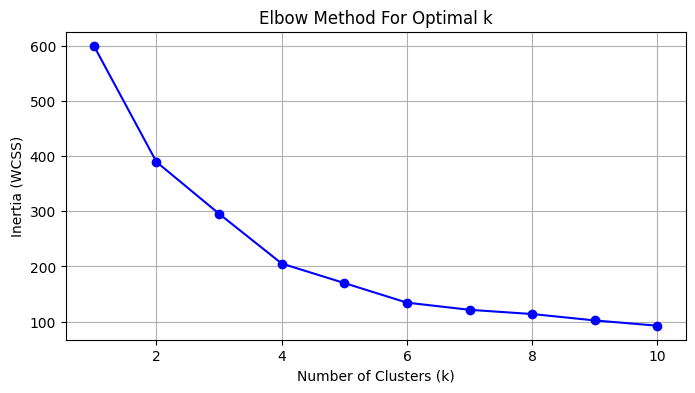

In [125]:

# Step 4: Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [126]:
# Step 5: Apply KMeans with chosen k (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

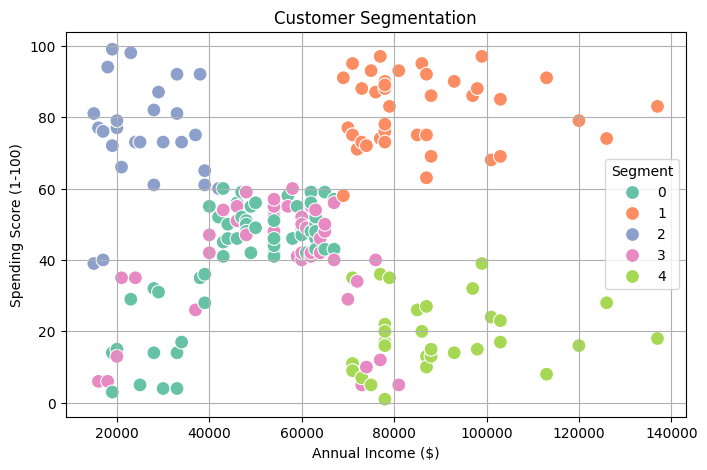

In [127]:
# Step 6: Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Segment', data=df, palette='Set2', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [128]:
# Define custom segment names (based on data analysis)
segment_labels = {
    0: 'Average Income, Average Spend',
    1: 'High Income, High Spend (VIP)',
    2: 'Low Income, High Spend (Budgeters)',
    3: 'Average Income, Average Spend',
    4: 'High Income,Low Spend'
}
# Map segment labels
df['Segment Label'] = df['Segment'].map(segment_labels)
df[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Segment', 'Segment Label']].head()



,Age,Annual Income ($),Spending Score (1-100),Segment,Segment Label
0,19,15000,39,2,"Low Income, High Spend (Budgeters)"
1,21,15000,81,2,"Low Income, High Spend (Budgeters)"
2,20,16000,6,3,"Average Income, Average Spend"
3,23,16000,77,2,"Low Income, High Spend (Budgeters)"
4,31,17000,40,2,"Low Income, High Spend (Budgeters)"


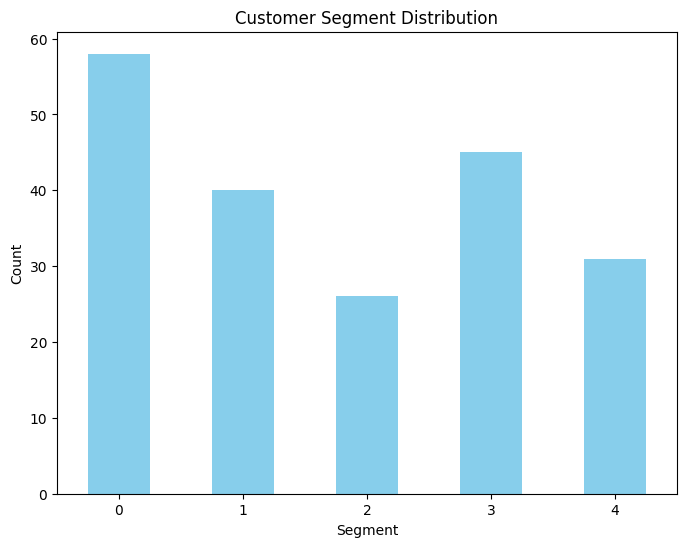

In [129]:
# Visualize the distribution of segments (sorted by segment number)
plt.figure(figsize=(8, 6))
df['Segment'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [130]:
# Aggregate customer data by segment
aggregation = df.groupby('Segment').agg(
    Average_Age=('Age', 'mean'),
    Average_Income=('Annual Income ($)', 'mean'),
    Average_Spending_Score=('Spending Score (1-100)', 'mean')
).reset_index()

# Show the aggregated data
print(aggregation)

   Segment  Average_Age  Average_Income  Average_Spending_Score
0        0    55.275862    47620.689655               41.706897
1        1    32.875000    86100.000000               81.525000
2        2    25.769231    26115.384615               74.846154
3        3    26.733333    54311.111111               40.911111
4        4    44.387097    89774.193548               18.483871
